In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [6]:
# from tf.keras.models import Sequential # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau

In [7]:
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [274]:
# import pandas as pd

# # 판다스 데이터프레임(DataFrame)을 출력할 때, 최대 출력할 수 있는 컬럼을 100개로 늘려줍니다.
# # 이렇게 해야 데이터를 분석할 때 출력해서 확인하기 편합니다.
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [5]:
# train = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/train.csv')
# test = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/test.csv')

In [8]:
weather_time = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/인천_시간별_기상자료.csv',encoding='euc-kr',index_col='일시',parse_dates=True)
del weather_time['지점']

In [7]:
# for k in range(1,len(train.columns) ): #시간을 제외한 1열부터 마지막 열까지를 for문으로 작동시킵니다.
#     train_median=train.iloc[:,k].median() #값을 대체하는 과정에서 값이 변경 될 것을 대비해 해당 세대의 중앙값을 미리 계산하고 시작합니다.
#     counting=train.loc[ train.iloc[:,k].isnull()==False ][ train.columns[k] ].index

#     df=pd.DataFrame( list( zip( counting[:-1], counting[1:] - counting[:-1] -1  ) ), columns=['index','count'] )
    
#     df2= df[ (df['count'] > 0) ] #결측치가 존재하는 부분만 추출
#     df2=df2.reset_index(drop=True) #기존에 존재하는 index를 초기화 하여 이후 for문에 사용함

#     for i,j in zip( df2['index'], df2['count'] ) : # i = 해당 세대에서 값이 존재하는 index, j = 현재 index 밑의 결측치 갯수
#         if train.iloc[i,k]>=train_median: #현재 index에 존재하는 값이 해당 세대의 중앙 값 이상일때만 분산처리 실행
#             train.iloc[ i : i+j+1 , k] = train.iloc[i,k] / (j+1) 
#             #현재 index 및 결측치의 갯수 만큼 지정을 하여, 현재 index에 있는 값을 해당 갯수만큼 나누어 줍니다
#         else:
#             pass
#             #현재 index에 존재하는 값이 중앙 값 미만이면 pass를 실행
#     if k%50==0: #for문 진행정도 확인용
#             print(k,"번째 실행중")

In [8]:
# for k in range(1,len(test.columns) ): #시간을 제외한 1열부터 마지막 열까지를 for문으로 작동시킵니다.
#     test_median=test.iloc[:,k].median() #값을 대체하는 과정에서 값이 변경 될 것을 대비해 해당 세대의 중앙값을 미리 계산하고 시작합니다.
#     counting=test.loc[ test.iloc[:,k].isnull()==False ][ test.columns[k] ].index

#     df=pd.DataFrame( list( zip( counting[:-1], counting[1:] - counting[:-1] -1  ) ), columns=['index','count'] )
    
#     df2= df[ (df['count'] > 0) ] #결측치가 존재하는 부분만 추출
#     df2=df2.reset_index(drop=True) #기존에 존재하는 index를 초기화 하여 이후 for문에 사용함

#     for i,j in zip( df2['index'], df2['count'] ) : # i = 해당 세대에서 값이 존재하는 index, j = 현재 index 밑의 결측치 갯수
#         if test.iloc[i,k]>=test_median: #현재 indetestx에 존재하는 값이 해당 세대의 중앙 값 이상일때만 분산처리 실행
#             test.iloc[ i : i+j+1 , k] = test.iloc[i,k] / (j+1) 
#             #현재 index 및 결측치의 갯수 만큼 지정을 하여, 현재 index에 있는 값을 해당 갯수만큼 나누어 줍니다
#         else:
#             pass
#             #현재 index에 존재하는 값이 중앙 값 미만이면 pass를 실행
#     if k%50==0: #for문 진행정도 확인용
#             print(k,"번째 실행중")

In [9]:
# train['Time'] = train['Time'].apply(pd.to_datetime)
# train.set_index('Time',inplace=True)

# test['Time'] = test['Time'].apply(pd.to_datetime)
# test.set_index('Time',inplace=True)

In [10]:
# train_sample = train['2018-02-15':]
# train_sample = train_sample.interpolate(method='values')

# test_sample = test['2018-02-15':]
# test_sample = test_sample.interpolate(method='values')

In [11]:
# # 결측값 가진 행 제거 - 데이터가 아예 없는 경우
# train_sample.loc[:,train_sample.isnull().sum() >= 1].columns

In [12]:
# #결측값 가진 행 제거 - 데이터가 아예 없는 경우
# test_sample.loc[:,test_sample.isnull().sum() >= 1].columns

In [13]:
# # forecast_test.csv 생성시에는 여기 실행 X

# train_sample.drop(['X4', 'X127', 'X9', 'X65', 'X54', 'X13', 'X53', 'X24', 'X17', 'X14',
#        'X48', 'X2', 'X19', 'X36', 'X28', 'X63', 'X38', 'X39', 'X8', 'X64',
#        'X29', 'X57', 'X705', 'X71', 'X3', 'X27', 'X22', 'X21', 'X118', 'X6',
#        'X45', 'X40', 'X66', 'X52', 'X12', 'X49', 'X1', 'X33', 'X60', 'X46',
#        'X963', 'X56', 'X15', 'X11', 'X25', 'X34', 'X23', 'X58'], axis=1, inplace=True)

# test_sample.drop(['X26', 'X16', 'X7', 'X18', 'X41', 'X55', 'X5', 'X43', 'X59', 'X10',
#        'X62', 'X61', 'X32', 'X31', 'X30', 'X51', 'X35', 'X44', 'X37', 'X42',
#        'X50', 'X47', 'X20'],axis=1,inplace=True)

In [14]:
############################################# 결측치 처리 ###############################################################

In [15]:
# # 1차 중간저장 ( 결측치 처리)

# train_sample.to_csv('train_sample')
# test_sample.to_csv('test_sample')

In [9]:
## 결측치 처리 된 Data Load
train_sample = pd.read_csv('train_sample',index_col='Time',parse_dates=True)
test_sample = pd.read_csv('test_sample',index_col='Time',parse_dates=True)

In [10]:
total = pd.concat([train_sample,test_sample],axis=1)

In [18]:
############################################# 입력신호 추가 ###############################################################

In [11]:
total['temp'] = weather_time['기온(°C)']['2018-02-15':]
total['humidity'] = weather_time['습도(%)']['2018-02-15':]
total[['temp','humidity']] = total[['temp','humidity']].interpolate(method='values')  # 온도 결측값을 시간에 따른 보간법으로 채움
total['DayOfWeek'] = total.index.dayofweek
total['Hour'] = total.index.hour

test_sample['temp'] = weather_time['기온(°C)']['2018-02-15':]
test_sample['humidity'] = weather_time['습도(%)']['2018-02-15':]
test_sample[['temp','humidity']] = test_sample[['temp','humidity']].interpolate(method='values')  # 온도 결측값을 시간에 따른 보간법으로 채움
test_sample['DayOfWeek'] = test_sample.index.dayofweek
test_sample['Hour'] = test_sample.index.hour

In [20]:
# forecast_test csv 생성
# test_sample.to_csv('forecast_test_시간별') 

In [12]:
## holiday_list 에 공휴일과 토요일/일요일 날짜를 넣음

# 공휴일 목록
holiday_list=[]
holiday_list=['2018-02-15','2018-02-16','2018-02-17','2018-03-01','2018-05-05','2018-05-07','2018-05-22','2018-06-06','2018-06-13']

# 토요일/일요일 

a= train_sample['2018-02-17':].resample('D').sum().index
b= train_sample['2018-02-19':].resample('B').sum().index

list_a = []
for i in range(len(a.values)):
    list_a.append(a.values[i])
list_b = []
for i in range(len(b.values)):
    list_b.append(b.values[i])

list_tmp = []
for i in list_a:
    if i not in list_b:
        list_tmp.append(i)
      
    
# list_tmp # 토요일/일요일
saturday_sunday = np.array(list_tmp) # 툐요일/일요일 index => ndarray

# # 주말목록 / 주말색인 구한 뒤 합침
for i in range(len(saturday_sunday)):
    holiday_list.append(str(saturday_sunday[i])[:10])

In [13]:
## 데이터 minmax scaling

from sklearn.preprocessing import MinMaxScaler

sc_MinMax = MinMaxScaler()
sc_temp = MinMaxScaler() # temp scaler
sc_humidity = MinMaxScaler() # humidity scaler
sc_DayOfWeek = MinMaxScaler() # DayOfWeek scaler
sc_Hour = MinMaxScaler()

# scaling
total_sc = sc_MinMax.fit_transform(total.iloc[:,:-4])
test_sample_sc = sc_MinMax.fit_transform(test_sample.iloc[:,:-4])
temp_sc = sc_temp.fit_transform(total[['temp']])
humidity_sc = sc_humidity.fit_transform(total[['humidity']])
DayOfWeek_sc = sc_DayOfWeek.fit_transform(total[['DayOfWeek']])
Hour_sc = sc_Hour.fit_transform(total[['Hour']])

# feature scale 데이터를 다시 합침 ( train + feature)
# np.cocatenate
total_sc = np.concatenate((total_sc, temp_sc), axis=1)
total_sc = np.concatenate((total_sc, humidity_sc), axis=1)
total_sc = np.concatenate((total_sc, DayOfWeek_sc), axis=1)
total_sc = np.concatenate((total_sc, Hour_sc), axis=1)



# feature scale 데이터를 다시 합침 ( test + feature)
# np.concatenate
test_sample_sc = np.concatenate((test_sample_sc, temp_sc), axis=1)
test_sample_sc = np.concatenate((test_sample_sc, humidity_sc), axis=1)
test_sample_sc = np.concatenate((test_sample_sc, DayOfWeek_sc), axis=1)
test_sample_sc = np.concatenate((test_sample_sc, Hour_sc), axis=1)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
# # 다시 DataFrame 으로
total = pd.DataFrame(total_sc, columns=total.columns,index=total.index)
test_sample = pd.DataFrame(test_sample_sc, columns=test_sample.columns,index=test_sample.index)

In [15]:
# train,test DataFrame에 주말/공휴일 feature를 추가

total['holiDay'] = 0 # holiday feature 추가 / 우선 0으로 

for i in range(len(total)):
    if str(total.index[i])[:10] in holiday_list :
        total['holiDay'].iloc[i] = 1 # 쉬는날이면 1
    else:
        total['holiDay'].iloc[i] = 0 # 쉬는날 아니면 0
        
test_sample['holiDay'] = 0 # holiday feature 추가 / 우선 0으로 

for i in range(len(test_sample)):
    if str(test_sample.index[i])[:10] in holiday_list :
        test_sample['holiDay'].iloc[i] = 1 # 쉬는날이면 1
    else:
        test_sample['holiDay'].iloc[i] = 0 # 쉬는날 아니면 0

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
## 중간 저장 (2차) ##
## 결측치,feature추가,scaling 완료

In [26]:
# train_sample.to_csv('train_sample_forecast_시간별')
# test_sample.to_csv('test_sample_forecast_시간별')

In [27]:
# train_sample = pd.read_csv('train_sample_forecast_시간별',index_col='Time',parse_dates=True) # scaling 된거
# test_sample = pd.read_csv('test_sample_forecast_시간별',index_col='Time',parse_dates=True)

In [28]:
#################################################### Shifting #################################################################

In [16]:
shift_step = 24

In [30]:
############################################### Train DATA #############################################################

In [17]:
total[['X692','temp','DayOfWeek','Hour','holiDay','humidity']][:"2018-06-29"].values[:-shift_step].shape

(3216, 6)

In [18]:
tmp_list = [] 
# 각 세대별 전력수요량+feature의 값을 model input 형식에 맞춤

for i in total.columns[:-5]: # 임시 list에 [전력량,기온,DayOfWeek,holiDay,humidity]의 형식으로 값을 하나씩 저장
    tmp_list.append(total[[i,'temp','DayOfWeek','Hour','holiDay','humidity']][:"2018-06-29"].values[:-shift_step].reshape(134,24,6)) 
    
to_formatted_x = np.array(tmp_list)

In [19]:
# res_x에 모든train 세대의 데이터(전력수요량,feature) 전부 넣음
res_x = to_formatted_x.reshape(to_formatted_x.shape[0]*to_formatted_x.shape[1],24,6)

res_x.shape

(191486, 24, 6)

> input=(전력수요량,기온,DayOfWeek,holiDay,humidity)  =>  output=(전력수요량)

In [20]:
for_shifting_y = total.shift(-shift_step)

tmp_shift_list = []
for i in total.columns[:-5]:
    tmp_shift_list.append(for_shifting_y[i][:"2018-06-29"].values[:-shift_step].reshape(134,24,1))

to_formatted_y = np.array(tmp_shift_list)

In [21]:
res_y = to_formatted_y.reshape(to_formatted_x.shape[0]*to_formatted_x.shape[1],24,1)

res_y.shape

(191486, 24, 1)

In [35]:
############################################### TEST DATA #############################################################

In [23]:
tmp_test_list = [] 
for i in test_sample.columns[:-5]:
    tmp_test_list.append(test_sample[[i,'temp','DayOfWeek','Hour','holiDay','humidity']]['2018-06-29'].values) 

to_formatted_test_x = np.array(tmp_test_list)

In [24]:
# res_test_x = to_formatted_test_x.reshape(to_formatted_test_x.shape[0]*to_formatted_test_x.shape[1],24,6)

res_test_x = to_formatted_test_x

In [25]:
for_shifting_y = test_sample

tmp_test_shift_list = []
for i in test_sample.columns[:-5]:
    tmp_test_shift_list.append(for_shifting_y[[i]]["2018-06-30"].values)

to_formatted_test_y = np.array(tmp_test_shift_list)

In [26]:
res_test_y = to_formatted_test_y
res_test_y.shape

(177, 24, 1)

In [38]:
############################################### Model #############################################################

In [27]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense ,Dropout
import keras.backend as K 
from keras.callbacks import EarlyStopping 
from keras.layers import TimeDistributed

K.clear_session()

model = Sequential() # Sequeatial Model 
model.add(LSTM(96, input_shape=(24, 6),return_sequences=True)) # (timestep, feature)
model.add(Dropout(0.3))
model.add(LSTM(96, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(96, return_sequences=True))
model.add(Dropout(0.3))
model.add(TimeDistributed(Dense(1, activation="linear")))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24, 96)            39552     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 24, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 96)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 24, 96)            74112     
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 96)            0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 24, 1)            

In [40]:
############################################### Model Training #############################################################

In [41]:
# early_stop = EarlyStopping(monitor='loss',patience=10, verbose=1)

# for i in range(1429):
#     print('%d epoch' %i)
#     model.fit(to_formatted_x[i], to_formatted_y[i], epochs=1, batch_size=1, shuffle=False,callbacks=[early_stop], validation_split=0.2)
#     model.reset_states()
    
# model.save('mnist_mlp_model.h5')


In [135]:
# 모델 학습
early_stop = EarlyStopping(monitor='loss',patience=5, verbose=1)

history = model.fit(res_x,res_y,epochs=2,batch_size=134,verbose=1,validation_split=0.1,shuffle=True,callbacks=[early_stop])

from keras.models import load_model
model.save('191121_Time_1_model.h5')

# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Train on 172337 samples, validate on 19149 samples
Epoch 1/2
172337/172337 [==============================] - 359s 2ms/step - loss: 0.0135 - val_loss: 0.0127
Epoch 2/2
172337/172337 [==============================] - 357s 2ms/step - loss: 0.0119 - val_loss: 0.0125


In [ ]:
score=model.evaluate(res_test_x,res_test_y,batch_size=134)
print(score)

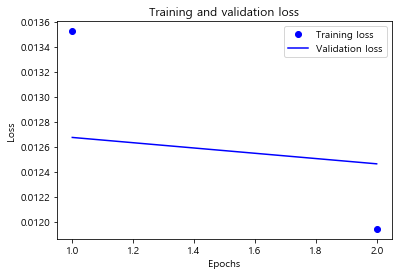

In [160]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')# ‘bo’는 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')# ‘b’는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
############################################### Predict #############################################################

In [ ]:
############################################### model loading #############################################################

In [28]:
from keras.models import load_model
model = load_model('191121_Time_1_model.h5')

In [29]:
pred = model.predict(res_test_x)

In [30]:
## to inverse minmax scale

col_list = test_sample.columns.insert(0,'임시')
tt_index = test_sample["2018-06-30"].index

test_inverse_df = pd.DataFrame()

for i in range(1,len(test_sample.columns)-4):# feature 제외
    tmp = i*24
    tt = pred.reshape(4248,1)[tmp-24 : tmp]    
    test_inverse_df[col_list[i]] = tt.reshape(24,)
    
test_inverse_df = test_inverse_df.set_index(tt_index)
test_inverse_df_array = sc_MinMax.inverse_transform(test_inverse_df)

In [31]:
# inverse minmax scale DataFrame 
res_test_df = pd.DataFrame(test_inverse_df_array, columns=test_inverse_df.columns,index=tt_index)

In [ ]:
# 예측한 결과물 DataFrame
# res_test_df

In [ ]:
# 결과물과 원본 DataFrame 모두 inverse scaling 

In [32]:
test_none_scale = pd.read_csv('test_sample',index_col='Time',parse_dates=True)

In [33]:
test_none_scale = test_none_scale.loc[:,:'X230']['2018-06-30']

In [34]:
test_sample.columns

Index(['X303', 'X241', 'X435', 'X402', 'X352', 'X305', 'X350', 'X326', 'X299',
       'X160',
       ...
       'X443', 'X347', 'X75', 'X107', 'X230', 'temp', 'humidity', 'DayOfWeek',
       'Hour', 'holiDay'],
      dtype='object', length=182)

> 결과 체크

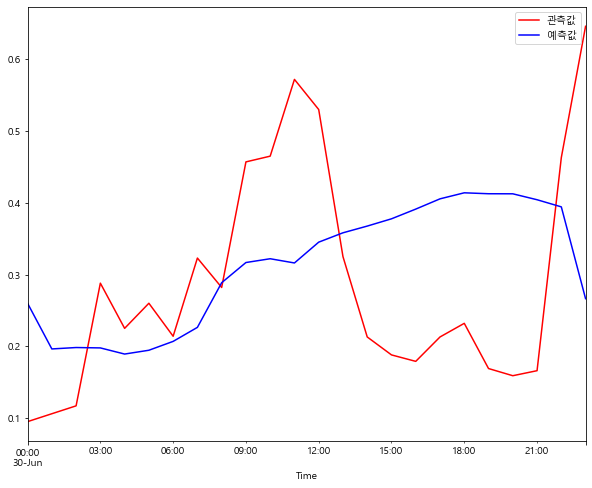

In [35]:
# 시간별

test_none_scale['X402'].plot(figsize=(10,8),color='red',label='관측값')
res_test_df['X402'].plot(figsize=(10,8),color='blue',label='예측값')
plt.legend()

In [ ]:
#################### forecast#########################

In [36]:
# 결측값 처리못한 컬럼들 따로 예측

forecast_test = pd.read_csv('forecast_test_시간별',index_col='Time',parse_dates=True)

In [37]:
from sklearn.preprocessing import MinMaxScaler

 # testSet scaler
forecast_test_sc = sc_MinMax.fit_transform(forecast_test.iloc[:,:-4])

forecast_test_sc = np.concatenate((forecast_test_sc, temp_sc), axis=1)
forecast_test_sc = np.concatenate((forecast_test_sc, humidity_sc), axis=1)
forecast_test_sc = np.concatenate((forecast_test_sc, DayOfWeek_sc), axis=1)
forecast_test_sc = np.concatenate((forecast_test_sc, Hour_sc), axis=1)

forecast_test = pd.DataFrame(forecast_test_sc, columns=forecast_test.columns,index=forecast_test.index)

forecast_test['holiDay'] = 0 # holiday feature 추가 / 우선 0으로 

for i in range(len(forecast_test)):
    if str(forecast_test.index[i])[:10] in holiday_list :
        forecast_test['holiDay'].iloc[i] = 1 # 쉬는날이면 1
    else:
        forecast_test['holiDay'].iloc[i] = 0 # 쉬는날 아니면 0

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
tmp_test_list = [] 
for i in forecast_test.columns[:-5]:
    tmp_test_list.append(forecast_test[[i,'temp','DayOfWeek','Hour','holiDay','humidity']]['2018-06-30'].values) 

to_formatted_test_x = np.array(tmp_test_list)

In [39]:
forecast_x = to_formatted_test_x

In [40]:
pred = model.predict(forecast_x)

In [41]:
## to inverse minmax scale

col_list = forecast_test.columns.insert(0,'임시')
tt_index = forecast_test['2018-06-01'].index # 07/01 ~ 07/10

test_inverse_df = pd.DataFrame()

for i in range(1,len(forecast_test.columns)-4):# temp col 제외
    tmp = i*24
    tt = pred.reshape(4800,1)[tmp-24:tmp]
    test_inverse_df[col_list[i]] = tt.reshape(24,)
    
test_inverse_df = test_inverse_df.set_index(tt_index)
test_inverse_df_array = sc_MinMax.inverse_transform(test_inverse_df)

In [42]:
# inverse minmax scale DataFrame 

res_forecast = pd.DataFrame(test_inverse_df_array, columns=test_inverse_df.columns,index=tt_index)

In [43]:
forecast_test.columns

Index(['X26', 'X303', 'X241', 'X435', 'X402', 'X352', 'X305', 'X350', 'X326',
       'X299',
       ...
       'X443', 'X347', 'X75', 'X107', 'X230', 'temp', 'humidity', 'DayOfWeek',
       'Hour', 'holiDay'],
      dtype='object', length=205)

In [44]:
res_forecast.to_csv("시간별 예측 결과") # 07/01 24시간